Input text

In [ ]:
import torch

inputs = torch.tensor(
  [[0.72, 0.45, 0.31], # Dream   (x^1)
   [0.75, 0.20, 0.55], # big     (x^2)
   [0.30, 0.80, 0.40], # and     (x^3)
   [0.85, 0.35, 0.60], # work    (x^4)
   [0.55, 0.15, 0.75], # for     (x^5)
   [0.25, 0.20, 0.85]] # it      (x^6)
)

# Corresponding words
words = ['Dream', 'big', 'and', 'work', 'for', 'it']

Magnitude of vectors

In [ ]:
# Calculate the magnitude of each vector
magnitudes = torch.norm(inputs, dim=1)

# Print the magnitudes
print("Magnitudes of the vectors:")
for word, magnitude in zip(words, magnitudes):
    print(f"{word}: {magnitude.item():.4f}")

Magnitudes of the vectors:
Dream: 0.9039
big: 0.9513
and: 0.9434
work: 1.0977
for: 0.9421
it: 0.9083


Plotting the 3D vectors

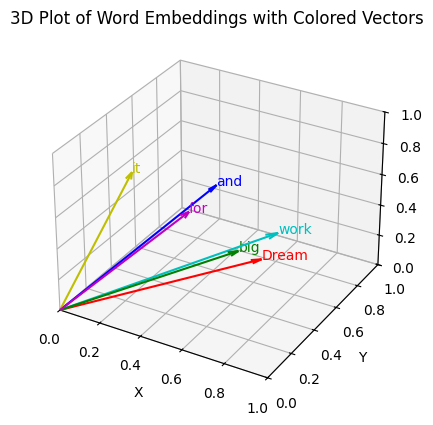

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# 3D plot with vectors from origin
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'c', 'm', 'y']

for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()

Dot product between 2nd input token and all words

In [ ]:
query = inputs[1]  # 2nd input token is the query

attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query) # dot product (transpose not necessary here since they are 1-dim vectors)

print(attn_scores_2)

tensor([0.8005, 0.9050, 0.6050, 1.0375, 0.8550, 0.6950])


Normalizing the attention weights

In [ ]:
attn_weights_2_tmp = attn_scores_2 / attn_scores_2.sum()

print("Attention weights:", attn_weights_2_tmp)
print("Sum:", attn_weights_2_tmp.sum())

Attention weights: tensor([0.1634, 0.1848, 0.1235, 0.2118, 0.1746, 0.1419])
Sum: tensor(1.0000)


Converting to softmax probabilities

In [ ]:
import tensorflow as tf

# Convert attn_scores_2 to a TensorFlow tensor
attn_scores_2_tf = tf.convert_to_tensor(attn_scores_2.numpy())

attn_weights_2_tmp = tf.nn.softmax(attn_scores_2_tf)

print("Attention weights:", attn_weights_2_tmp.numpy())
print("Sum:", attn_weights_2_tmp.numpy().sum())

Attention weights: [0.16244562 0.18033989 0.13359906 0.20589025 0.1715446  0.14618066]
Sum: 1.0000001


Attention scores for all queries

In [ ]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.8170, 0.8005, 0.7000, 0.9555, 0.6960, 0.5335],
        [0.8005, 0.9050, 0.6050, 1.0375, 0.8550, 0.6950],
        [0.7000, 0.6050, 0.8900, 0.7750, 0.5850, 0.5750],
        [0.9555, 1.0375, 0.7750, 1.2050, 0.9700, 0.7925],
        [0.6960, 0.8550, 0.5850, 0.9700, 0.8875, 0.8050],
        [0.5335, 0.6950, 0.5750, 0.7925, 0.8050, 0.8250]])


Attention scores converted to attention weights

In [ ]:
attn_weights = torch.softmax(attn_scores, dim=-1)
print(attn_weights)

tensor([[0.1766, 0.1738, 0.1571, 0.2029, 0.1565, 0.1330],
        [0.1624, 0.1803, 0.1336, 0.2059, 0.1715, 0.1462],
        [0.1675, 0.1523, 0.2025, 0.1805, 0.1493, 0.1478],
        [0.1648, 0.1789, 0.1376, 0.2115, 0.1672, 0.1400],
        [0.1491, 0.1747, 0.1334, 0.1960, 0.1805, 0.1662],
        [0.1396, 0.1641, 0.1455, 0.1809, 0.1831, 0.1868]])


Sum of each row is 1

In [ ]:
row_2_sum = sum([0.1624, 0.1803, 0.1336, 0.2059, 0.1715, 0.1462])
print("Row 2 sum:", row_2_sum)
print("All row sums:", attn_weights.sum(dim=-1))

Row 2 sum: 0.9999
All row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


Printing the context vectors for all queries

In [ ]:
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)

tensor([[0.5965, 0.3611, 0.5654],
        [0.5982, 0.3431, 0.5794],
        [0.5681, 0.3830, 0.5627],
        [0.6008, 0.3471, 0.5758],
        [0.5859, 0.3377, 0.5900],
        [0.5684, 0.3402, 0.5964]])


Context vector corresponding to the 2nd input

In [ ]:
context_vec_2 =all_context_vecs[1]
print("Previous 2nd context vector:", context_vec_2)

Previous 2nd context vector: tensor([0.5982, 0.3431, 0.5794])


Adding context vector just for plotting

In [ ]:
# Append context_vec_2 to inputs
inputs = torch.cat((inputs, context_vec_2.unsqueeze(0)), dim=0)

# Add 'context_vector' to the words list
words.append('context_vector_for_big')

print("Updated inputs tensor:")
print(inputs)
print("\nUpdated words list:")
print(words)

Updated inputs tensor:
tensor([[0.7200, 0.4500, 0.3100],
        [0.7500, 0.2000, 0.5500],
        [0.3000, 0.8000, 0.4000],
        [0.8500, 0.3500, 0.6000],
        [0.5500, 0.1500, 0.7500],
        [0.2500, 0.2000, 0.8500],
        [0.5982, 0.3431, 0.5794]])

Updated words list:
['Dream', 'big', 'and', 'work', 'for', 'it', 'context_vector_for_big']


Plotting context vector for 2nd input token

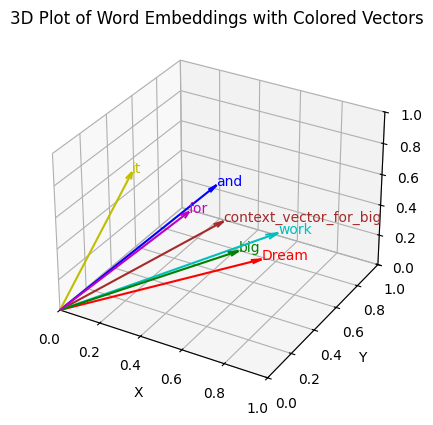

In [ ]:
# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# 3D plot with vectors from origin
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'c', 'm', 'y','brown']

for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()
